The cool lab 5 😎

In [1]:
#load in the dataset
import pandas as pd
import numpy as np
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [2]:
#the goal here is the simple binary classification, is it going to rain or not tomorrow?
#lets see how many rows there are
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', "RainToday"]
df.groupby(['RainTomorrow']).count()
#looks like we have about 110316 for no rain and 31877 for rain. This is great! I do not think we need to fold with this much per class

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
RainTomorrow,,,,,,,,,,,,,,,,,,,,,
No,127094,127094,126489,126659,126253,67584,61353,118844,118880,117244,...,125728,123663,113703,113724,74794,70837,126390,124352,126253,127094
Yes,35280,35280,35051,35216,34525,18626,17597,32474,32499,33083,...,34671,34075,31725,31707,22591,22084,34934,34329,34525,35280


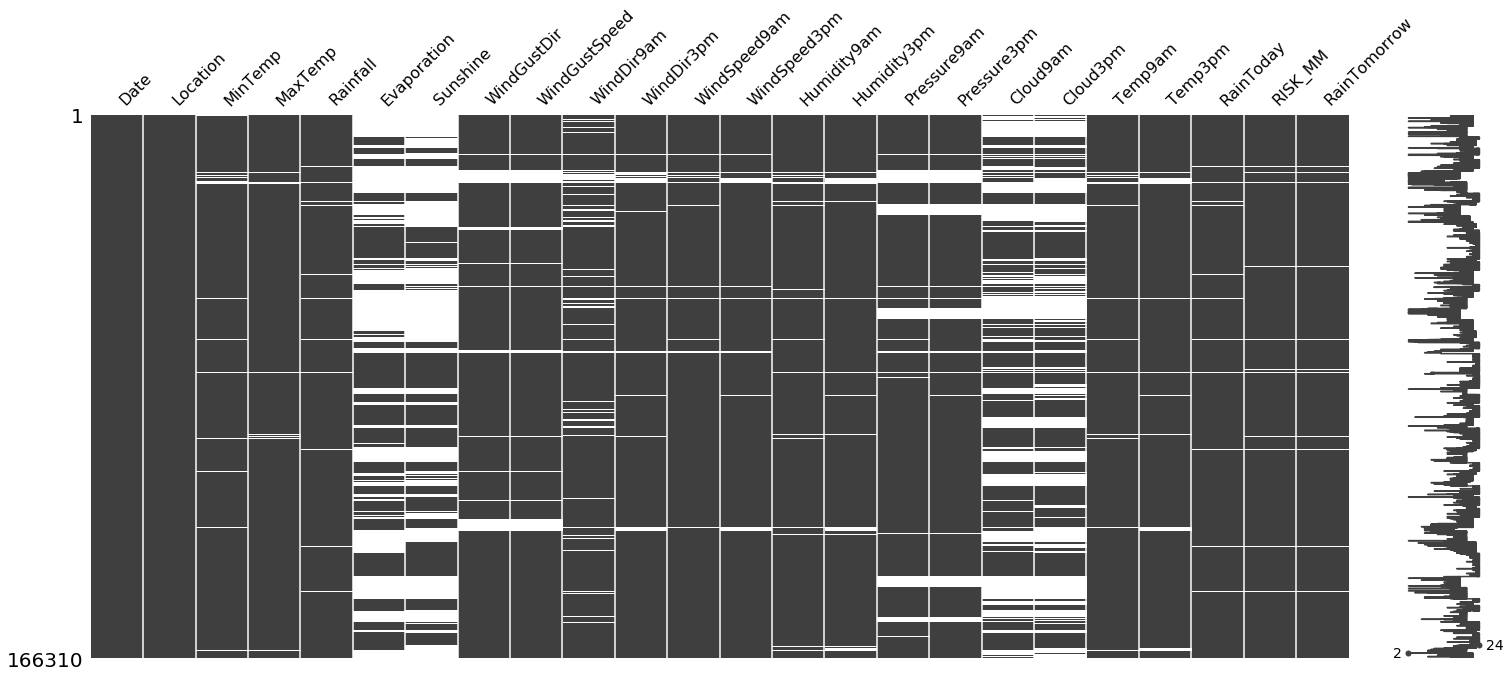

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

mn.matrix(df)

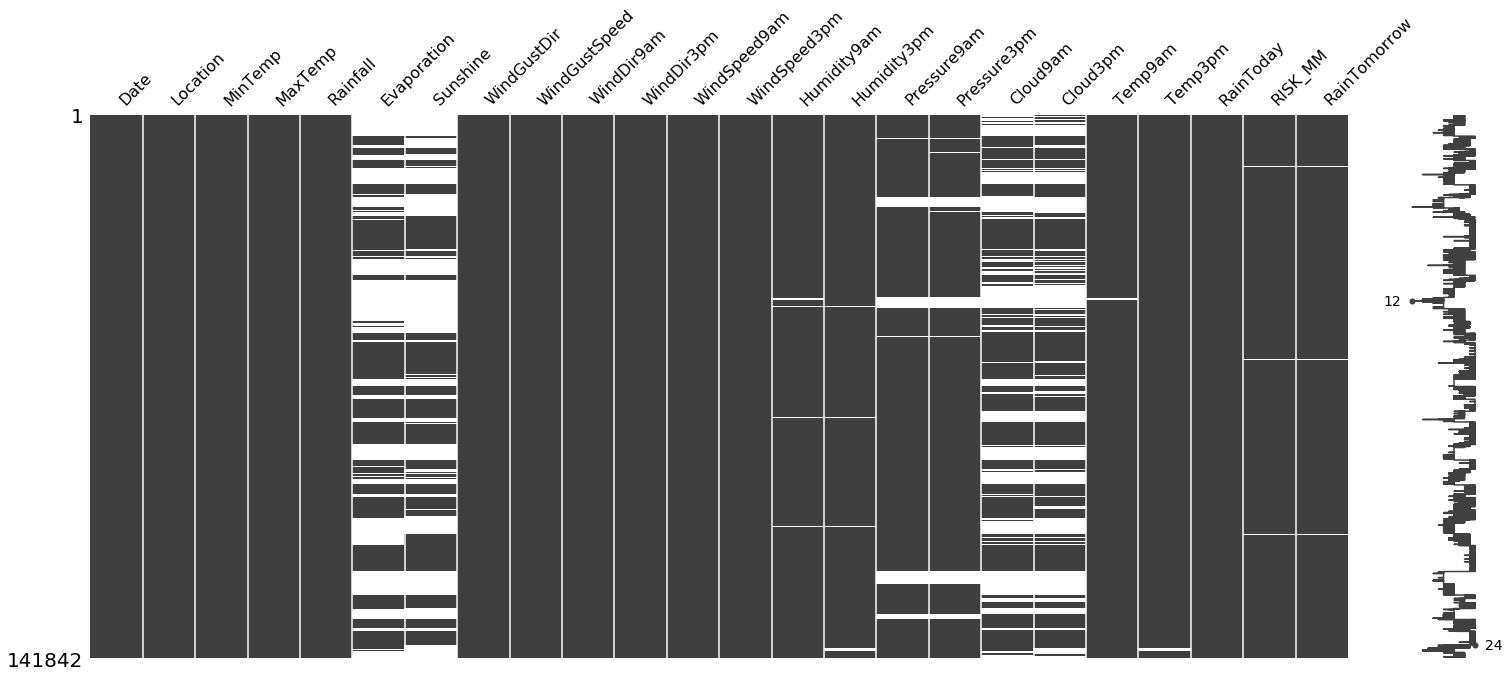

In [4]:
#NOOO We have to make sure we have no NaNs. This is gonna be a pain in the ass
#this many imputations is gonna need a whole package to make this easy for me
#df = df.drop(columns=['Date'])
# from fancyimpute import KNN   #message me if you have trouble installing this. 

#WE NEED TO REMOVE ALL ROWS MISSING ANY CATEGORICAL DATA bc its dumb to impute
df= df.dropna(subset=categorical_cols)
mn.matrix(df)

oooo. this is wacky looking. this link is an interesting read on what to do with the 4 variables that have a ton of null values    https://towardsdatascience.com/handling-missing-values-in-machine-learning-part-1-dda69d4f88ca   
for now... well just ignore it :(


In [5]:
#lets split into train and test, were gonna do a standard 80/20 split for now
#first lets grab y as the 
di = {"No": 0, "Yes": 1}
df = df.replace({"RainTomorrow": di})
y = df['RainTomorrow']
df.drop(columns=['RainTomorrow'])

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166303,2019-09-23,Uluru,13.7,24.2,0.0,NaN,NaN,E,48.0,E,...,24.0,16.0,1027.4,1023.8,3.0,1.0,16.8,23.5,No,0.6
166306,2019-09-26,Uluru,9.7,30.2,0.0,NaN,NaN,NW,26.0,E,...,52.0,20.0,1022.3,1016.8,NaN,NaN,18.9,29.0,No,0.0
166307,2019-09-27,Uluru,11.1,33.6,0.0,NaN,NaN,WNW,26.0,ENE,...,31.0,13.0,1020.1,1016.0,NaN,1.0,23.7,32.4,No,0.0
166308,2019-09-28,Uluru,13.8,36.1,0.0,NaN,NaN,NNW,30.0,E,...,24.0,10.0,1018.5,1014.3,NaN,NaN,25.3,35.3,No,0.0


In [6]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
166303    0.0
166306    0.0
166307    0.0
166308    0.0
166309    0.0
Name: RainTomorrow, Length: 141842, dtype: float64

In [7]:
#one hot encode here
df_copy = df
for col in categorical_cols:
    one_hot = pd.get_dummies(df[col],prefix=col, drop_first=True)
    df = df.join(one_hot)
df = df.drop(columns=categorical_cols)
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,2008-12-01,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,...,0,0,0,0,0,0,0,1,0,0
1,2008-12-02,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,...,0,0,0,0,0,0,0,0,1,0
2,2008-12-03,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,...,0,0,0,0,0,0,0,0,1,0
3,2008-12-04,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,...,1,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df_numeric = df.select_dtypes(include=[np.float, np.int])
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df_numeric.values)  
IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=np.nan, n_nearest_features=None,
                 random_state=0, sample_posterior=False, tol=.001,
                 verbose=0)
df_nums = ((imp.transform(df_numeric.values)))


C:\Users\abres\Anaconda\envs\mlenv\lib\site-packages\sklearn\impute\_iterative.py:603: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [9]:
counter = 0
print(df.shape)
for col in df_numeric:
    df[col] = df_nums[:,counter]
    counter +=1
df

(141842, 111)


,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,2008-12-01,13.4,22.9,0.6,6.346198,7.066686,44.0,20.0,24.0,71.0,...,0,0,0,0,0,0,0,1,0,0
1,2008-12-02,7.4,25.1,0.0,6.204718,10.913243,44.0,4.0,22.0,44.0,...,0,0,0,0,0,0,0,0,1,0
2,2008-12-03,12.9,25.7,0.0,8.604507,11.659416,46.0,19.0,26.0,38.0,...,0,0,0,0,0,0,0,0,1,0
3,2008-12-04,9.2,28.0,0.0,6.785752,11.187407,24.0,11.0,9.0,45.0,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,17.5,32.3,1.0,7.415483,5.939397,41.0,7.0,20.0,82.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166303,2019-09-23,13.7,24.2,0.0,9.144313,10.444306,48.0,24.0,28.0,24.0,...,0,0,0,0,0,0,0,0,0,0
166306,2019-09-26,9.7,30.2,0.0,6.693005,11.580369,26.0,13.0,11.0,52.0,...,0,0,0,0,0,0,0,0,0,0
166307,2019-09-27,11.1,33.6,0.0,8.555469,13.607030,26.0,2.0,13.0,31.0,...,0,0,0,0,0,0,0,0,0,0
166308,2019-09-28,13.8,36.1,0.0,10.153574,13.526884,30.0,13.0,11.0,24.0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = .20)
encoded_train, encoded_test, encoded_y_train, encoded_y_test = train_test_split(df_copy, y, test_size = .20)
print(encoded_y_train, encoded_train)

65765     1.0
29898     0.0
72013     0.0
133288    0.0
107108    0.0
         ... 
122511    0.0
118436    0.0
88369     0.0
163612    NaN
66182     0.0
Name: RainTomorrow, Length: 113473, dtype: float64               Date    Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
65765   2018-06-13    Ballarat      3.7     10.7       2.6          NaN   
29898   2015-08-27     Penrith     10.4     20.6       4.0          NaN   
72013   2015-08-03        Sale      5.6     10.6       4.2          NaN   
133288  2016-01-06  PearceRAAF     19.4     37.4       0.0          NaN   
107108  2010-08-09  Townsville     17.2     27.8       0.0          NaN   
...            ...         ...      ...      ...       ...          ...   
122511  2014-10-23     Woomera     15.3     34.9       0.0         13.6   
118436  2012-11-23   Nuriootpa     13.2     33.5       0.0          8.0   
88369   2017-11-02    Portland     10.2     14.8       2.0          NaN   
163612  2017-11-06   Katherine     28.0      

In [11]:
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#standard wide and deep with no cross columns

from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import concatenate
# now let's encode the integer outputs as one hot encoded labels
ohe = OneHotEncoder()
numeric_cols = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", 
                "WindSpeed3pm", "Humidity3pm", "Pressure9am", "Humidity9am", "Pressure3pm", 
               "Cloud9am", "Temp9am", "Cloud3pm", "Temp3pm", "RISK_MM"]

feature_columns = categorical_cols+numeric_cols
# we should not be standard scaling our categorical features. This is wrong

In [12]:
#TODO: we need to decide on our columns we think have relation? I dont even want to think about that right now tbh
#probably use f1 score because we want to get a good true positive vs negative rate for a binary classification.

### This is the standard wide/deep network that I made 
X_train_num =  encoded_train[numeric_cols].values
X_test_num = encoded_test[numeric_cols].values
dfs = []
dfs_test = []

# we need to create separate sequential models for each embedding
embed_branches = []
X_ints_train = [] # keep track of inputs for each branch
X_ints_test = []# keep track of inputs for each branch
all_inputs = [] # this is what we will give to keras.Model inputs
all_branch_outputs = [] 


encoders = dict() 
for col in categorical_cols:
    encoders[col] = LabelEncoder() # save the encoder
    print(encoded_train[col].values)
    encoded_train[col+'_int'] = encoders[col].fit_transform(encoded_train[col])
    encoded_test[col+'_int'] = encoders[col].transform(encoded_test[col])
    print(encoded_train[col+"_int"])
    
    # encode as ints for the embedding
    X_ints_train.append( encoded_train[col + "_int" ].values ) # this df_train is a vector of the integers we are one hot encoding
    X_ints_test.append( encoded_test[col + "_int"].values )
    # get the number of categories
    N = max(X_ints_train[-1]+1) # same as the max(df_train[col]) grab the last column, whats the max value +1. this value tells us how many categories there are for that variable
    
    # create embedding branch from the number of categories
    inputs = Input(shape=(1,),dtype='int32', name=col)
    all_inputs.append( inputs ) # keep track of created inputs
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(inputs)
    x = Flatten()(x)
    all_branch_outputs.append(x)
all_inputs.append(Input(shape=(X_train_num.shape[1],),sparse=False, name='numeric'))
x = Dense(units=20, activation='relu',name='numeric_1')(all_inputs[-1])
all_branch_outputs.append( Dense(units=10,activation='relu', name='numeric_2')(x) )

# merge the branches together
final_branch = concatenate(all_branch_outputs, name='concat_1')
final_branch = Dense(units=1,activation='sigmoid', name='combined')(final_branch)

model = Model(inputs=all_inputs, outputs=final_branch)
    

['Ballarat' 'Penrith' 'Sale' ... 'Portland' 'Katherine' 'Ballarat']
65765      4
29898     28
72013     33
133288    27
107108    37
          ..
122511    46
118436    26
88369     31
163612    15
66182      4
Name: Location_int, Length: 113473, dtype: int32


C:\Users\abres\Anaconda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\abres\Anaconda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['N' 'NW' 'WSW' ... 'SE' 'N' 'WSW']
65765      3
29898      7
72013     15
133288    13
107108     1
          ..
122511    15
118436     4
88369      9
163612     3
66182     15
Name: WindGustDir_int, Length: 113473, dtype: int32
['N' 'N' 'WSW' ... 'SSE' 'WNW' 'NNW']
65765      3
29898      3
72013     15
133288     4
107108     9
          ..
122511    10
118436     4
88369     10
163612    14
66182      6
Name: WindDir9am_int, Length: 113473, dtype: int32
['NNW' 'N' 'W' ... 'S' 'ENE' 'WNW']
65765      6
29898      3
72013     13
133288    12
107108     1
          ..
122511    15
118436     3
88369      8
163612     1
66182     14
Name: WindDir3pm_int, Length: 113473, dtype: int32
['Yes' 'Yes' 'Yes' ... 'Yes' 'No' 'No']
65765     1
29898     1
72013     1
133288    0
107108    0
         ..
122511    0
118436    0
88369     1
163612    0
66182     0
Name: RainToday_int, Length: 113473, dtype: int32


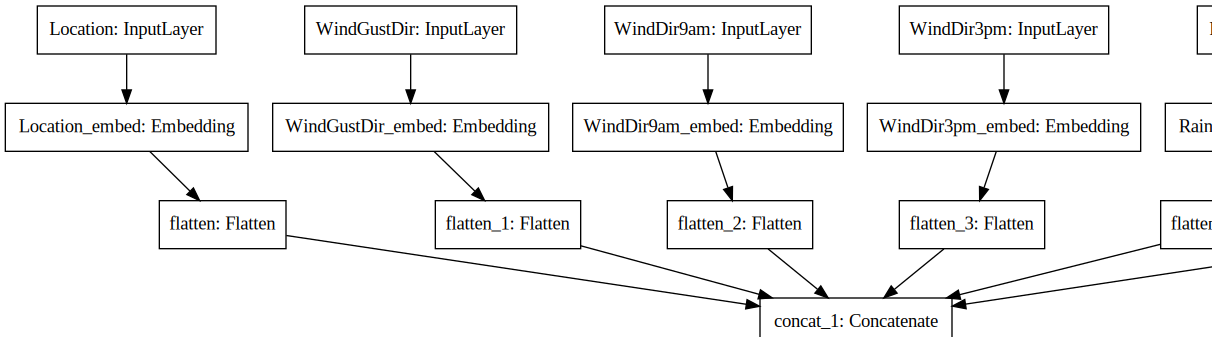

In [13]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

# you will need to install pydot properly on your machine to get this running
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [14]:
%%time

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.fit(X_ints_train + [X_train_num], # create a list of inputs for embeddings
        encoded_y_train.to_numpy(), epochs=10, batch_size=32, verbose=1)

# yhat = model.predict([X_test_ohe,
#                       X_test_num]) # each branch has an input

# yhat = np.round(yhat)
# print(mt.confusion_matrix(y_test,yhat),mt.accuracy_score(y_test,yhat))

Train on 113473 samples
Epoch 1/10
113473/113473 [==============================] - 41s 362us/sample - loss: nan - accuracy: 0.2135
Epoch 2/10
113473/113473 [==============================] - 38s 332us/sample - loss: nan - accuracy: 0.2133
Epoch 3/10
113473/113473 [==============================] - 38s 337us/sample - loss: nan - accuracy: 0.2133
Epoch 4/10
113473/113473 [==============================] - 39s 341us/sample - loss: nan - accuracy: 0.2133
Epoch 5/10
113473/113473 [==============================] - 38s 331us/sample - loss: nan - accuracy: 0.2133
Epoch 6/10
113473/113473 [==============================] - 37s 325us/sample - loss: nan - accuracy: 0.2133
Epoch 7/10
113473/113473 [==============================] - 37s 325us/sample - loss: nan - accuracy: 0.2133
Epoch 8/10
113473/113473 [==============================] - 37s 330us/sample - loss: nan - accuracy: 0.2133
Epoch 9/10
113473/113473 [==============================] - 39s 340us/sample - loss: nan - accuracy: 0.2133
Epoc